# (Current working project not completed yet)

# Project: Simulating ORIT.L(Octopus Renewable Infrastructure Trust) Stock Price for the Next 100 Days 

ORIT.L market capitalisation is slightly over £400m and ≈ 545.22m shares in issue

### Overview:
- In this project, I aim to predict possible future stock prices of ORIT.L
(Octopus Renewable Infrastructure Trust) Stock Price using Monte Carlo Simulations and 
the Geometric Brownian Motion (GBM) model.

# The Why?
- Utilise simulations to estimate risk and returns.
- Use Monte Carlo simulations to model uncertainty and randomness.
- Understanding stock price behavior can aid in making informed investment decisions.



## Step 1: Install & Import Dependencies

In [1]:


# Import required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Step 2: Fetch Historical ORIT.L Data
### Why?
We need real-world data to compute:
- Historical mean return (μ)
- Historical volatility (σ)

Fetch the last one year of ORIT.L stock prices:

In [2]:
# Download ORIT.L(Octopus) stock historical data
data = yf.download("ORIT.L", start="2024-05-20", end="2025-05-20", auto_adjust=True)

# Display the first few rows of the dataset
print(data.head()) 

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker         ORIT.L     ORIT.L     ORIT.L     ORIT.L   ORIT.L
Date                                                           
2024-05-20  69.642662  73.339623  69.642662  73.339623  2115623
2024-05-21  68.843330  71.541107  68.543574  71.541107  3868105
2024-05-22  68.143906  70.142261  68.143906  68.643494  1160146
2024-05-23  66.345390  70.342100  66.345390  69.942428  2461543
2024-05-24  65.945717  67.444483  65.845801  66.145549  1793036


This fetches a DataFrame with columns like Open, High, Low, Close, Volume, and Adjusted Close.

- We will use the 'Close' price. 'Close' represents the raw market closing price.

## Step 3: Compute Returns and Volatility
### Why?
Stock price follows a random walk with drift, so we compute:

Daily returns = (𝑃𝑡 − 𝑃𝑡−1) / P𝑡−1

Average return (μ) = Mean of daily returns

Volatility (σ) = Standard deviation of daily returns

In [3]:
# Use Close instead of Adjusted Close
data['Returns'] = data['Close'].pct_change()

# Compute mean return and volatility
mu = data['Returns'].mean()
sigma = data['Returns'].std()

# Print mean return and volatility
print(f"Mean Return (μ): {mu:.6f}")
print(f"Volatility (σ): {sigma:.6f}")  

Mean Return (μ): 0.000274
Volatility (σ): 0.014450


Mean Return μ > 0, indicates Octopus(ORIT.L) has a long-term upward trend.
If μ < 0 would have meant the opposite is true (downward trend).

 
Volatility (σ) measures how much stock's returns fluctuate.
Higher σ means more price variability (risk), while lower σ indicates more stable returns.

## Step 4: Visualizing Historical Stock Prices

A plot will help to observe trends and volatility before running simulations.

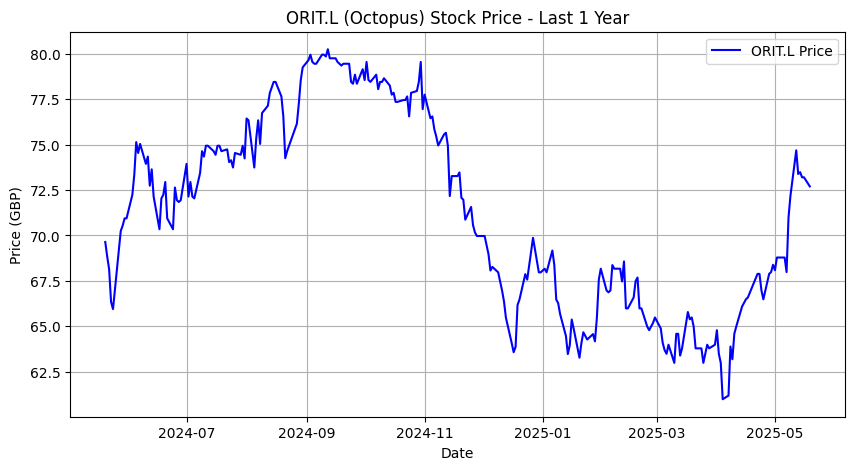

In [4]:
# plot historical price
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label="ORIT.L Price", color="blue")
plt.title("ORIT.L (Octopus) Stock Price - Last 1 Year")
plt.xlabel("Date")
plt.ylabel("Price (GBP)")
plt.legend()
plt.grid()
plt.show()

## Step 5: Implement Monte Carlo Simulation

### Understanding the Model:

We use the Geometric Brownian Motion (GBM) equation:

$$
S_{t+1} = S_t \times \exp\left[\left(\mu - \frac{1}{2}\sigma^2\right)\Delta t + \sigma \sqrt{\Delta t} Z\right]
$$

where:
- $S_{t+1}$ = Next day's simulated price
- $S_t$ = Today's price
- $\mu$ = Mean return (drift)
- $\sigma$ = Volatility
- $\Delta t$ = Time step (typically 1 day, so $\Delta t = 1$)
- $Z$ = Random variable from a standard normal distribution

Simulating 10,000 Future Paths

We simulate 10,000 different future stock price trajectories over 100 days.

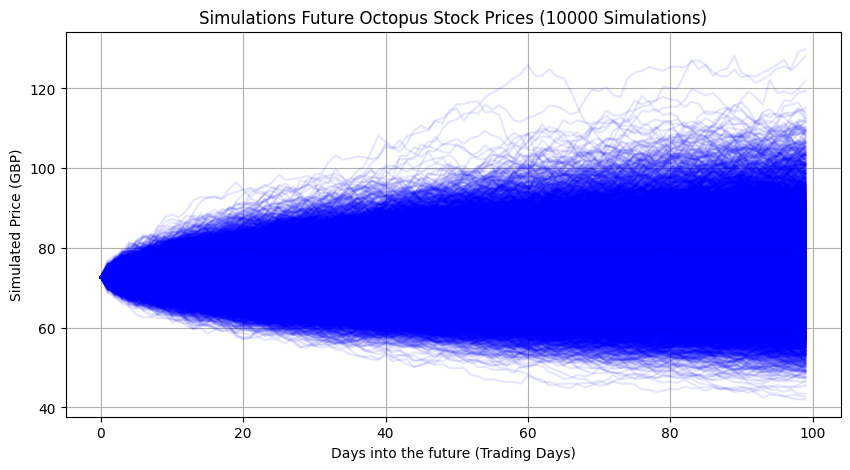

In [ ]:
# Params for Monte Carlo simulation
num_simulations = 10000
num_days = 100  # Number of trading days in the future to simulate
stock_close = data['Close'].iloc[-1]  # Last known stock price

# A matrix to hold the simulated stock prices
simulations = np.zeros((num_days, num_simulations))
simulations[0] = stock_close  # Set the initial price for all simulations


# Run Monte Carlo simulations
for i in range(1, num_days):
   Z = np.random.normal(0, 1, num_simulations)  # Generate random normal variables
   simulations[i] = simulations[i - 1] * np.exp((mu - 0.5 * sigma ** 2) + sigma * Z)

# Plot the resulting simulations
plt.figure(figsize=(10, 5))
plt.plot(simulations, color='blue', alpha=0.1)
plt.title("Simulations of Future Octopus Stock Prices (10000 Simulations)")
plt.xlabel("Days into the future (Trading Days)")
plt.ylabel("Simulated Price (GBP)")
plt.grid()
plt.show()





 ## Plot simulation explanation
 
The Simulation above is for 10,000 different price paths based  on historical trends.

Every line is a represantantion of a possible future predictive Octopus stock price.

The huge spread is an indication of high volatility signaling uncertainty.

## Step 6: Stock Price Statistics and Risk Analysis 

- Predicted average Octopus stock price
- Best and worst case outcomes 
- probabilities of negative price fluctuations

In [ ]:
# Computation of price distribution on the 100th day
price_distribution = simulations[-1, :]

# Average price post 100th day, best and worst case scenarios in percentiles
average_price = np.mean(price_distribution)

best_case = np.percentile(price_distribution, 95)
median_case = np.percentile(price_distribution, 50)
worst_case = np.percentile(price_distribution, 5)

# Print the results
print(f"Average Price post 100 Days: {average_price:.2f} GBP")
print(f"Best Case Price (95th Percentile): {best_case:.2f} GBP")
print(f"Median Price (50th Percentile): {median_case:.2f} GBP")
print(f"Worst Case Price (5th Percentile): {worst_case:.2f} GBP")

Average Price post 100 Days: 74.52 GBP
Best Case Price (95th Percentile): 93.17 GBP
Median Price (50th Percentile): 73.86 GBP
Worst Case Price (5th Percentile): 58.14 GBP


## Results Analysis

- Average price is the most probable Octopus stock priceon the 100th day.
- The 95th percentile is the best predicted outcome with 5% probability to go above this point. 
- The 5th percentile is worst predicted outcome with also 5% probability to go above this point. 

## Risk Analysis 

- In the scenario where the 5th percentile(worst case)is lower than today's price, would be an 
indication of a possible risk for short-term investment.

### Step 7: Volatility Test 

- Here we conducting different scenarios evaluation using volatility levels interactively.



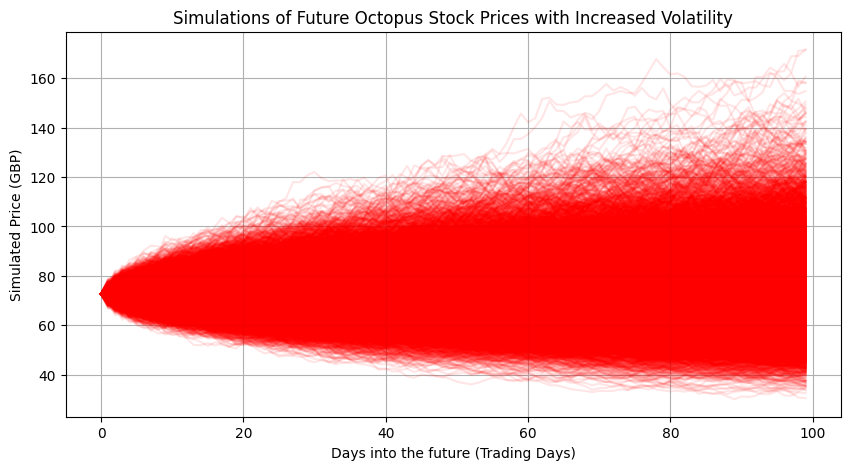

In [9]:
# Increment of volatility by 60%
sigma_increased = sigma * 1.6

# Running simulations with increased volatility
simulations_increased_volatility = np.zeros((num_days, num_simulations))
simulations_increased_volatility[0] = stock_close  # Set the initial price for all simulations
for i in range(1, num_days):
    Z = np.random.normal(0, 1, num_simulations)  # Generate random normal variables
    simulations_increased_volatility[i] = simulations_increased_volatility[i - 1] * np.exp(
        (mu - 0.5 * sigma_increased ** 2) + sigma_increased * Z)
    
# Plot the resulting simulations with increased volatility
plt.figure(figsize=(10, 5))
plt.plot(simulations_increased_volatility, color='red', alpha=0.1)
plt.title("Simulations of Future Octopus Stock Prices with Increased Volatility")
plt.xlabel("Days into the future (Trading Days)")
plt.ylabel("Simulated Price (GBP)")
plt.grid()
plt.show()


In [10]:
# Computation of price distribution on the 100th day with increased volatility
price_distribution_increased_volatility = simulations_increased_volatility[-1, :]

# Average price post 100th day with increased volatility, best and worst case scenarios in percentiles
average_price_increased_volatility = np.mean(price_distribution_increased_volatility)
best_case_increased_volatility = np.percentile(price_distribution_increased_volatility, 95)
median_case_increased_volatility = np.percentile(price_distribution_increased_volatility, 50)
worst_case_increased_volatility = np.percentile(price_distribution_increased_volatility, 5)

# Print the results with increased volatility
print(f"Average Price post 100 Days (Increased Volatility): {average_price_increased_volatility:.2f} GBP")
print(f"Best Case Price (95th Percentile, Increased Volatility): {best_case_increased_volatility:.2f} GBP")
print(f"Median Price (50th Percentile, Increased Volatility): {median_case_increased_volatility:.2f} GBP")
print(f"Worst Case Price (5th Percentile, Increased Volatility): {worst_case_increased_volatility:.2f} GBP")    

Average Price post 100 Days (Increased Volatility): 74.61 GBP
Best Case Price (95th Percentile, Increased Volatility): 106.03 GBP
Median Price (50th Percentile, Increased Volatility): 72.81 GBP
Worst Case Price (5th Percentile, Increased Volatility): 49.95 GBP


In [6]:
# References:
# 1. yfinance documentation: https://pypi.org/project/yfinance/
# 2. Matplotlib documentation: https://matplotlib.org/stable/contents.html
# https://www.lse.co.uk/buy-shares.html?shareprice=ORIT&share=Octopus-Energy

